In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_in = plt.imread('beans.png')
img0 = np.floor(img_in[:,:,0] * 255).astype(int)
M, N = img0.shape
C = 256

In [3]:
def get_histogram(img):
    histogram = np.zeros(256, dtype=int)
    for val in img.flatten():
    for val in img.flatten():
        histogram[val] += 1
    return histogram

In [4]:
def plot_hist(hist):
    plt.bar(np.arange(0, 256, dtype=int), hist)

In [5]:
def plot_img_hist(img):
    _, axarr = plt.subplots(1, 2, figsize=(8,4))
    axarr[0].imshow(img, cmap='grey', vmin=0, vmax=256)
    axarr[1].bar(np.arange(0, 256, dtype=int), get_histogram(img))
    # axarr[1].hist(img.flatten(), np.arange(0, 256))

In [6]:
def cdf(hist):
    s = np.zeros(256, dtype=int)
    for r in range(1, 256):
        s[r] = s[r-1] + hist[r]
    return np.floor(s * 255 / (M * N)).astype(int)
    

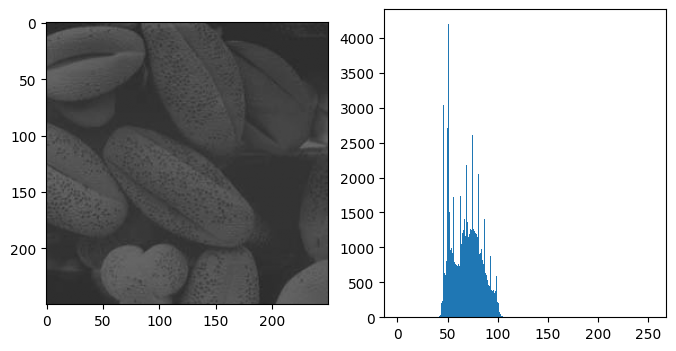

In [7]:
plot_img_hist(img0)

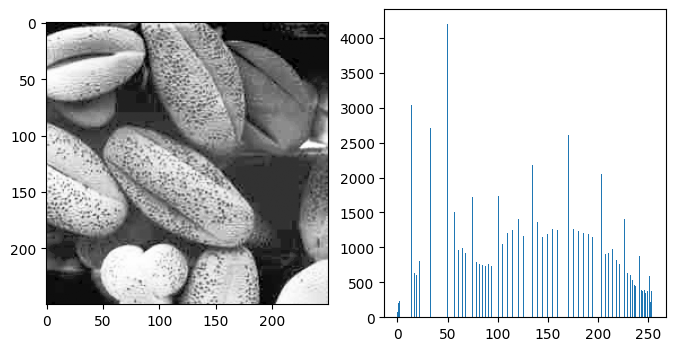

In [8]:
g = get_histogram(img0)
T = cdf(g)
img1 = np.vectorize(lambda r: T[r])(img0)
plot_img_hist(img1)

In [12]:
img_in = plt.imread('beans_light.png')
img2 = np.floor(img_in[:,:,0] * 255).astype(int)
M, N = img2.shape

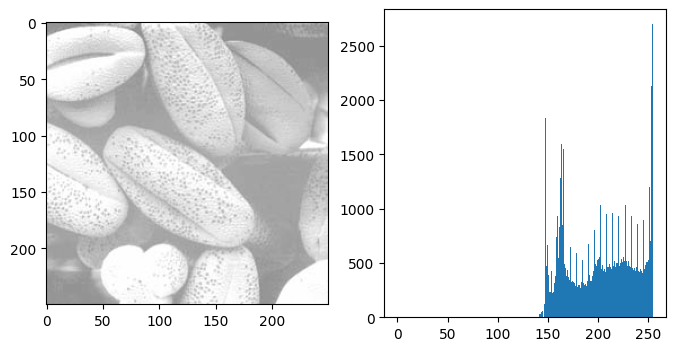

In [13]:
plot_img_hist(img2)

In [28]:
# T: array[r: int(0, 255)] -> s: int(0, 255)
def invert_t(T):
    T_inv = np.zeros(256, dtype=int)
    r = 0
    for s in range(256):
        while s > T[r] or (s == 0 and T[r] == 0):
            r += 1
        T_inv[s] = r
    return T_inv
        

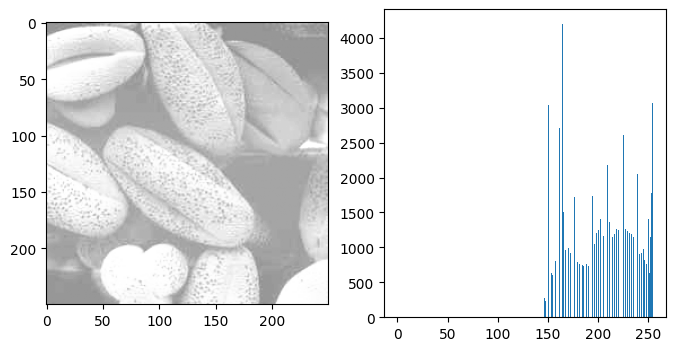

In [29]:
# img0 specified to histogram of img2
g1 = get_histogram(img2)
T1 = cdf(g1)
T1_inv = invert_t(T1)
img3 = np.vectorize(lambda s: T1_inv[s])(img1)
plot_img_hist(img3)

In [23]:
T

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   2,  14,  17,  19,  22,  33,  50,
        57,  61,  65,  68,  75,  79,  82,  85,  88,  91,  94, 101, 105,
       110, 115, 121, 126, 135, 140, 145, 150, 155, 160, 171, 176, 181,
       186, 191, 195, 204, 208, 211, 215, 219, 222, 227, 230, 233, 235,
       237, 238, 242, 244, 245, 247, 248, 250, 252, 253, 254, 254, 254,
       254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25